# X's Community Notes Audit

Group 2: Daphne He, Anthony Lee, Stephanie Liu

### Contributions:

Daphne - Analyzing community notes data set with misleading tweet classications.

Anthony - Analyzing ratings data set of all community note ratings.

Stephanie - Analyzing note status history and user enrollment data sets.

## Introduction 

### Research Question: 
What kind of misinformation is rampant on Twitter (X) and how effective are Community Notes in combatting this? How can it be improved?
What are the key characteristics or features of community notes that correlate with high ratings of helpfulness in addressing misinformation on Twitter?

### Problem
Community Notes play an important role in combatting and addressing misinformation on Twitter (X). Despite this, there are unclear guidelines on how to write a Community Note and most notes are peer evaluated and subjective. We aim to identify key features that make Community Notes helpful to provide guidance for the contributors to follow in the future to effectively address misleading or inaccurate tweets. 

### Understanding the Notes Dataset
When a contributor submits a Community Note, they are asked to a multiple choice response form for the tweet they want to address. They have to classify it as "NOT_MISLEADING" or "MISINFORMED_OR_POTENTIALLY_MISLEADING." Tweets are also identified as either "BELIEVABLE_BY_FEW" or "BELIEVABLE_BY_MANY" if widely spread, "LITTLE_HARM" or "CONSIDERABLE_HARM", "EASY" or "CHALLENGING" to validate. 

### Classifying Misleading Tweets
Contributors can flag tweets by checking misleadingFactualError, misleadingManipulatedMedia,	misleadingOutdatedInformation,	misleadingMissingImportantContext,	misleadingUnverifiedClaimAsFact, and misleadingSatire. In the dataset, the relevant field would be labled 1 if true and 0 if false. 

### Classifying Not Misleading Tweets
Contributors can also marks tweets that aren't misleading as notMisleadingFactuallyCorrect,	notMisleadingOutdatedButNotWhenWritten,	notMisleadingClearlySatire,	notMisleadingPersonalOpinion, and trustworthySources. In the dataset, the relevant field would be labled 1 if true and 0 if false.

### Note Summary Field 
This is where we can see the Community Note written by the contributor, which is useful for future sentiment analysis, as community notes are also rated based on several parameters to determine overall helpfulness. This would be very helpful along with our ratings dataset, which evaluates the quality of community notes written by contributors to combat misinformation. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
notes_df = pd.read_csv('data/notes.csv')
ratings_df = pd.read_csv('data/ratings.csv')
merged_df = pd.merge(notes_df, ratings_df, on='noteId', how='inner')
merged_df

,noteId,noteAuthorParticipantId,createdAtMillis_x,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,...,notHelpfulMissingKeyPoints,notHelpfulOutdated,notHelpfulHardToUnderstand,notHelpfulArgumentativeOrBiased,notHelpfulOffTopic,notHelpfulSpamHarassmentOrAbuse,notHelpfulIrrelevantSources,notHelpfulOpinionSpeculation,notHelpfulNoteNotNeeded,ratedOnTweetId
0,1783181538789605871,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978583415,1783171851818021181,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1783171851818021181
1,1783181538789605871,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978583415,1783171851818021181,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1783171851818021181
2,1783181538789605871,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978583415,1783171851818021181,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,1,1783171851818021181
3,1783181538789605871,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978583415,1783171851818021181,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1783171851818021181
4,1586769867381669889,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1667150391800,1586411168880807936,NOT_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13533,1769857672114024502,F2C463A0653C0B8BEC74317C3EB028AE6AA3A83495F5BE...,1710801926055,1769657861817487379,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1769657861817487379
13534,1775711591646081459,4CB461F5149875E1A34CB5FC0C435B4E0BC9BB5CAF9348...,1712197609231,1775684777670267182,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,...,1,0,0,0,0,0,0,0,1,1775684777670267182
13535,1746787265626476833,90AB3A4A4AE4D20223527F29BFA8844EE444918B19C671...,1705301512521,1746601716668117196,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1746601716668117196
13536,1746799072147653096,90AB3A4A4AE4D20223527F29BFA8844EE444918B19C671...,1705304327412,1746675050592268540,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,...,0,0,0,0,0,0,0,0,0,1746675050592268540


### Misleading vs Not Misleading
As you can see in the bar graph below, there is around four times and amount of misinformed or misleading tweets in comparison to not misleading tweets. This shows how much misinformation is rampant on Twitter, which calls for robust and effective systems in place to address them in a timely manner. 

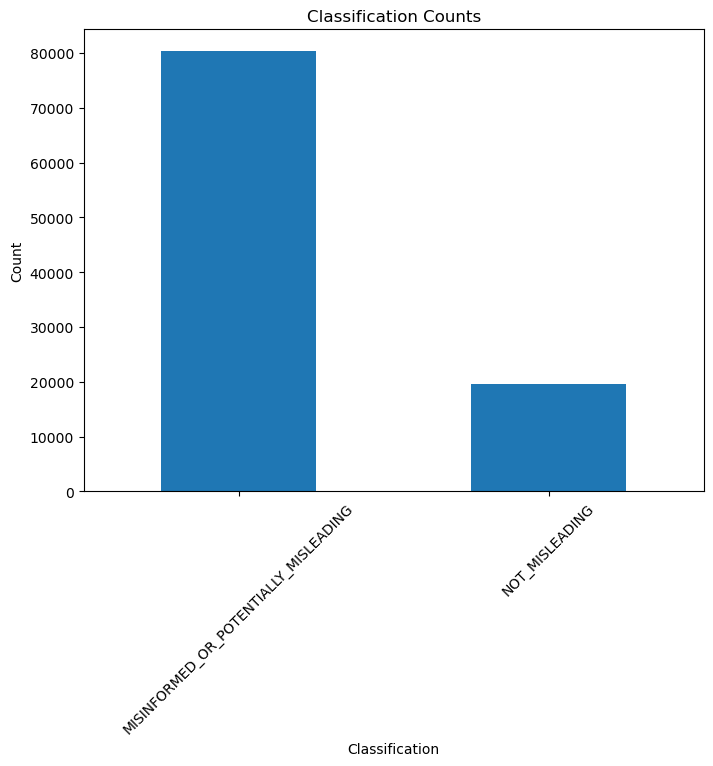

In [4]:
# Count the occurrences of each classification
classification_counts = data['classification'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
classification_counts.plot(kind='bar')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.title('Classification Counts')
plt.xticks(rotation=45)
plt.show()

### Tweet Classification
This bar graph shows the distribution of different classifications of misleading tweets. As you can see, most tweets are flagged by Community Note contributors due to missing important context, followed by factual error and unverified claim as fact. 

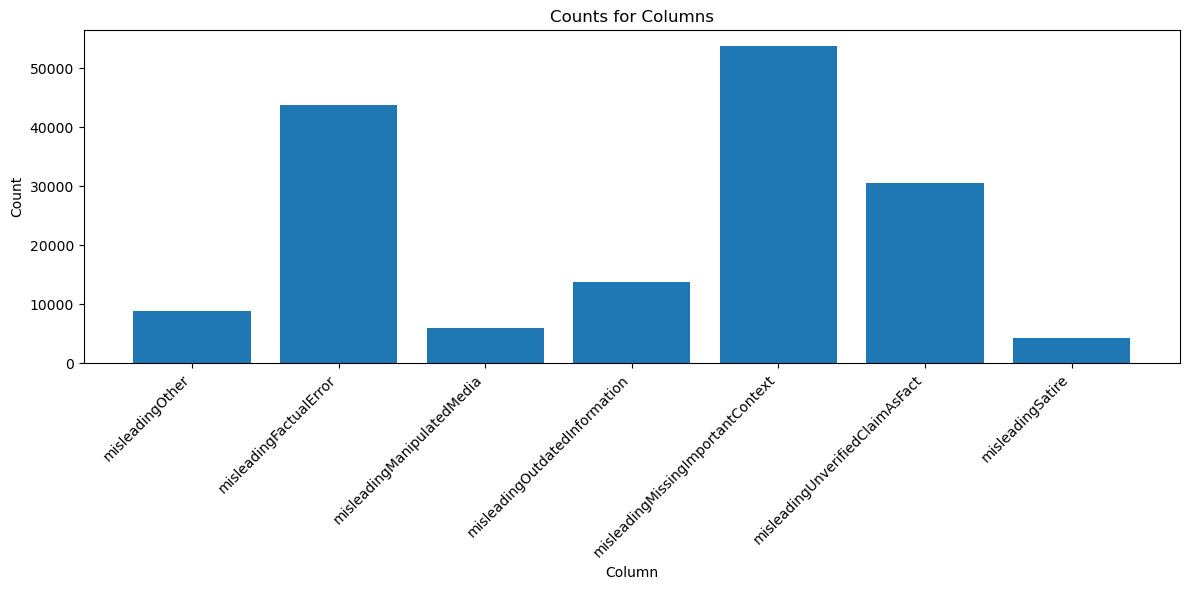

In [5]:
# Columns to plot
columns = ['misleadingOther', 'misleadingFactualError', 'misleadingManipulatedMedia',
           'misleadingOutdatedInformation', 'misleadingMissingImportantContext',
           'misleadingUnverifiedClaimAsFact', 'misleadingSatire']

# Count the occurrences of True and False values for each column
counts = data[columns].sum().reset_index()
counts.columns = ['Column', 'Count']

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(counts['Column'], counts['Count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Column')
plt.ylabel('Count')
plt.title('Counts for Columns')
plt.tight_layout()
plt.show()

### Tweet Classification
This bar graph shows the distribution of different classifications of not misleading tweets. As you can see, most tweets that aren't misleading have trustworthy sources, followed by factually correct and personoal opinion.  

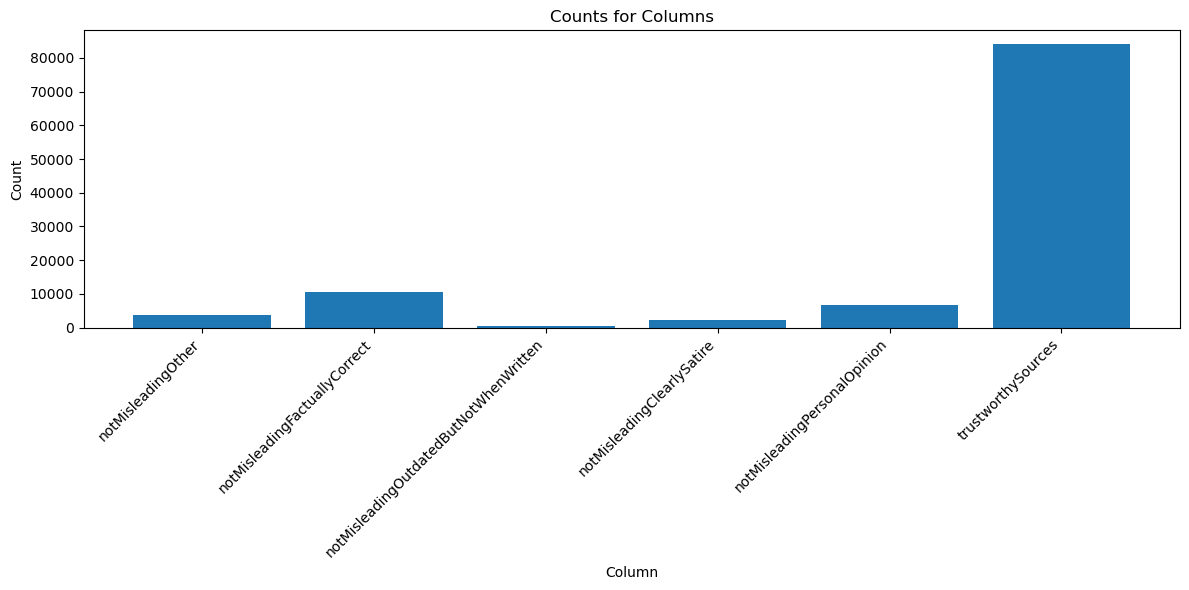

In [6]:
# Columns to plot
columns = ['notMisleadingOther','notMisleadingFactuallyCorrect', 'notMisleadingOutdatedButNotWhenWritten',
           'notMisleadingClearlySatire', 'notMisleadingPersonalOpinion', 'trustworthySources']

# Count the occurrences of True and False values for each column
counts = data[columns].sum().reset_index()
counts.columns = ['Column', 'Count']

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(counts['Column'], counts['Count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Column')
plt.ylabel('Count')
plt.title('Counts for Columns')
plt.tight_layout()
plt.show()

In [7]:
import numpy as np

### Believable vs Harmful Tweets

**Believable:** If this tweet were widely spread, its message would likely be believed by: "BELIEVABLE_BY_FEW" or "BELIEVABLE_BY_MANY."

**Harmful:** If many believed this tweet, it might cause: "LITTLE_HARM" or "CONSIDERABLE_HARM."

After graphing different combinations, we can see an overwhelming amount of tweets that are both "BELIEVABLE_BY_MANY" and "CONSIDERABLE_HARM." This is quite concerning, which give us more insight into this extensive problem space. 

<Figure size 1000x600 with 0 Axes>

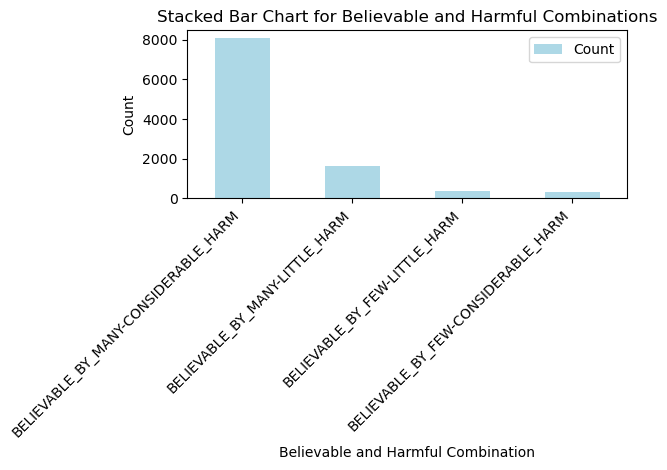

In [8]:
df_b_h = data[['believable', 'harmful']]

# Replace NaN with 'Unknown'
df_b_h = df_b_h.fillna('Unknown')  # Use fillna to replace NaN values with 'Unknown'

# Combine the 'believable' and 'harmful' columns into a single column for counting occurrences
df_b_h['Combination'] = df_b_h['believable'] + '-' + df_b_h['harmful']

# Count the occurrences
counts = df_b_h['Combination'].value_counts().reset_index()
counts.columns = ['Combination', 'Count']

# Remove the 'Unknown-Unknown' group
counts = counts[counts['Combination'] != 'Unknown-Unknown']

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
ax = counts.plot(kind='bar', x='Combination', y='Count', stacked=True, color=['lightblue'])
plt.xlabel('Believable and Harmful Combination')
plt.ylabel('Count')
plt.title('Stacked Bar Chart for Believable and Harmful Combinations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Believable Pie Chart
As we can see in the pie chart below, most misleading tweets that are flagged are quite disruptive, as over 94% are marked "BELIEVABLE_BY_MANY" by the contributor. 

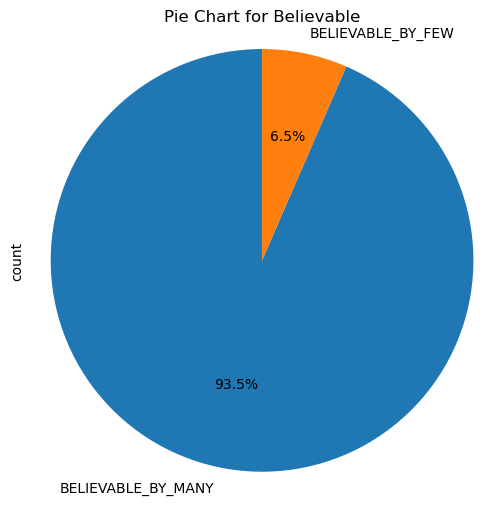

In [9]:
# Count the occurrences of 'believable' values
believable_counts = data['believable'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
ax = believable_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for Believable')
plt.show()

### Harmful Pie Chart
As we can see in the pie chart below, most misleading tweets that are flagged are very harmful, as over 79% are marked "CONSIDERABLE_HARM" by the contributor. 

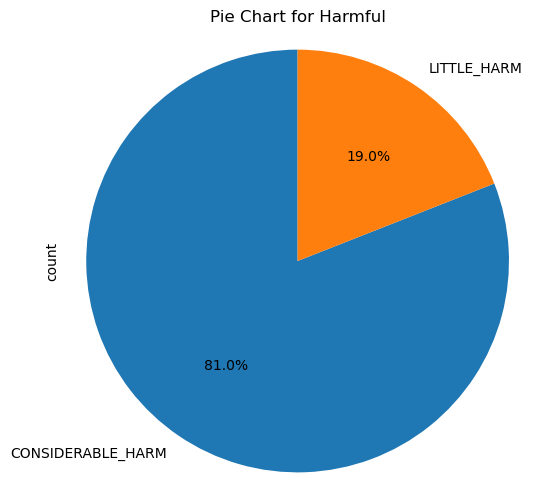

In [11]:
# Count the occurrences of 'harmful' values
harmful_counts = data['harmful'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
ax = harmful_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for Harmful')
plt.show()

### Limitations:
Some fields like "believable," "harmful," and "validationDifficulty" deprecated as of 2022-10-27, so if we want to look at data past this point, we would no longer be able to access these three fields.

### Next Steps
We will combine information from all of our different datasets and analyze the factors that influence the helpfulness of a community note to identify key patterns and features to make clear guidelines for contributors to follow. We will also perfom sentiment analysis on the notes and use machine learning models test accuracy in Community Note helpfulness classification. 